# Deep Learning with Python

# 2. Before we begin : the mathematical building blocks of neural networks

# p27 : 2.1 A first look at a neural network

텐서플로우 불러오기 및 버전 확인

In [1]:
import tensorflow as tf

tf.keras.__version__

'2.4.0'

mnist train, test 데이터 불러오기

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


데이터 타입 확인

In [3]:
print(type(train_images))

<class 'numpy.ndarray'>


데이터 차원 확인

In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


test label 예시 데이터 출력

In [5]:
test_labels[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

단방향 모델 정의 및 3개의 layer 추가

Flatten : (28, 28) input 차원을 (28 * 28, ) output 차원으로 변환

In [6]:
from keras import models
from keras import layers

# 단방향 모델 정의
network = models.Sequential()

# 모델에 layer 추가
network.add(layers.Flatten(input_shape = (28, 28)))
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28, )))
network.add(layers.Dense(10, activation = 'softmax'))

학습 방법 설정 : optimizer (최적화 방법), loss (오차 계산식), metric (성능 평가 지표)

In [7]:
# 모델의 학습 방법 설정
network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

이미지 데이터 정규화 및 라벨 데이터 onehot encoding

In [8]:
from keras.utils import to_categorical

train_normalized = train_images / 255
test_normalized = test_images / 255

train_categories = to_categorical(train_labels)
test_categories = to_categorical(test_labels)

In [9]:
test_categories[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

모델 학습, epochs와 batch size 지정하여 메모리 부담 완화, gpu 사용시 batch size에 따라 속도가 달라짐

In [10]:
# 모델 학습, epochs와 batch_size 지정
network.fit(train_normalized, train_categories, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.4361 - accuracy: 0.8768
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1157 - accuracy: 0.9656
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0699 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0503 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0376 - accuracy: 0.9890


In [11]:
# testset을 이용한 성능 평가, evaluate 메소드 사용
test_loss, test_acc = network.evaluate(test_normalized, test_categories)

313/313 [==============================] - 1s 3ms/step - loss: 0.0693 - accuracy: 0.9802


In [12]:
print("Test accuracy : {}".format(round(test_acc, 4)))

Test accuracy : 0.9802


# p31 : 2.2 Data representations for neural networks

In [13]:
import numpy as np

In [14]:
# scalar = 0D tensor

x0 = np.array(12)
print(x0)
print(x0.ndim)

12
0


In [15]:
# vector = 1D tensor

x1 = np.array([12, 3, 6, 14])
print(x1)
print(x1.ndim)

[12  3  6 14]
1


In [16]:
# matrix = 2D tensor

x2 = np.round(np.random.randn(3, 5), 2)
print(x2)
print(x2.ndim)

[[-1.64 -0.15 -0.87 -0.14  0.57]
 [-0.65 -0.08  0.54 -0.58 -1.14]
 [-0.36 -0.46  0.31  0.69  0.77]]
2


In [17]:
# 3D tensor

x3 = np.round(np.random.randn(3, 4, 5), 2)
print(x3)
print(x3.ndim)

[[[-0.65  0.52  2.39 -2.35  1.11]
  [-1.5   0.88  0.03 -1.64 -0.12]
  [ 0.79  0.18 -0.77 -0.05 -0.59]
  [-0.02 -1.35 -0.07  0.21  0.83]]

 [[ 0.08 -0.08 -1.07 -0.4  -0.91]
  [-0.48  0.31  0.47 -0.69  0.51]
  [ 0.03 -0.06  1.42 -0.81 -0.47]
  [-1.29  0.16  0.34  0.27  0.58]]

 [[-0.04  1.68  0.15  1.19 -0.83]
  [-0.69  1.33 -0.4  -0.07 -0.77]
  [-1.58  0.85  0.93  0.56 -1.28]
  [-0.33 -0.45  0.56 -0.64  0.59]]]
3


In [18]:
print(x3.ndim)
print(x3.shape)
print(x3.dtype)

3
(3, 4, 5)
float64


In [19]:
print(train_images.shape)
print(train_images.dtype)

(60000, 28, 28)
uint8


In [20]:
import matplotlib
import matplotlib.pyplot as plt

In [21]:
digit = train_images[4]

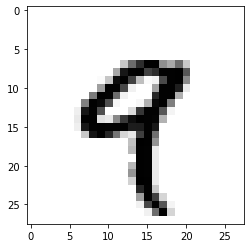

In [22]:
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [23]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [24]:
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

(90, 28, 28)


In [25]:
my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)


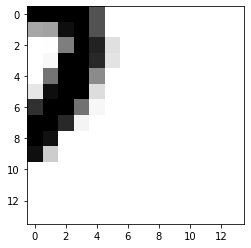

In [26]:
my_slice = train_images[10, 14:, 14:]

plt.imshow(my_slice, cmap = plt.cm.binary)
plt.show()

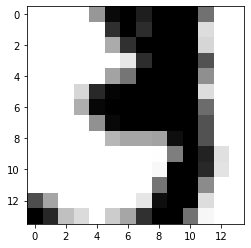

In [27]:
my_slice = train_images[10, 7:-7, 7:-7]

plt.imshow(my_slice, cmap = plt.cm.binary)
plt.show()

In [28]:
batch_0 = train_images[:128]
batch_1 = train_images[128:256]
# ...으로 나눠서 학습한다는 것이 batch의 개념

# p38 : 2.3 The gears of neural networks : tensor operations

element-wise calculation  
broadcasting  
tensor dot  
tensor reshape  

# p46 : 2.4 The engine of neural networks : gradient-based optimization

 # Chapter summary

1. Learning means finding a combination of model parameters that minimizes a loss function for a given set of training data samples and their corresponding targets.

2. Learning happens by drawing random batches of data samples and their
targets, and computing the gradient of the network parameters with
respect to the loss on the batch. The network parameters are then moved
a bit (the magnitude of the move is defined by the learning rate) in the
opposite direction from the gradient.

3. The entire learning process is made possible by the fact that neural networks are chains of differentiable tensor operations, and thus it’s possible
to apply the chain rule of derivation to find the gradient function mapping the current parameters and current batch of data to a gradient value.

4. Two key concepts you’ll see frequently in future chapters are loss and optimizers. These are the two things you need to define before you begin feeding data into a network.

5. The loss is the quantity you’ll attempt to minimize during training, so it
should represent a measure of success for the task you’re trying to solve.

6. The optimizer specifies the exact way in which the gradient of the loss will
be used to update parameters: for instance, it could be the RMSProp optimizer, SGD with momentum, and so on.